<a href="https://colab.research.google.com/github/khanhduy0703/desktop-tutorial/blob/main/ti%C3%AAu_%C4%91%C6%B0%E1%BB%9Dng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


📋 Cấu trúc mạng nơ-ron:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 256)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,569 (178.00 KB)

 Trainable params: 45,569 (178.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6532 - loss: 0.6641 - val_accuracy: 0.7468 - val_loss: 0.5640
Epoch 2/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7553 - loss: 0.5441 - val_accuracy: 0.7273 - val_loss: 0.4939
Epoch 3/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7720 - loss: 0.4924 - val_accuracy: 0.7273 - val_loss: 0.4804
Epoch 4/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7879 - loss: 0.4672 - val_accuracy: 0.7273 - val_loss: 0.4747
Epoch 5/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7870 - loss: 0.4489 - val_accuracy: 0.7273 - val_loss: 0.4717
Epoch 6/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7921 - loss: 0.4348 - val_accuracy: 0.7468 - val_loss: 0.4719
Epoch 7/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7961 - loss: 0.4234 - val_accuracy: 0.7532 - val_loss: 0.4712
Epoch 8/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8109 - loss: 0.4125 - val_accuracy: 

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

🎯 Accuracy trên tập test: 0.7013

📊 Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77        99
           1       0.58      0.56      0.57        55

    accuracy                           0.70       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.70      0.70       154



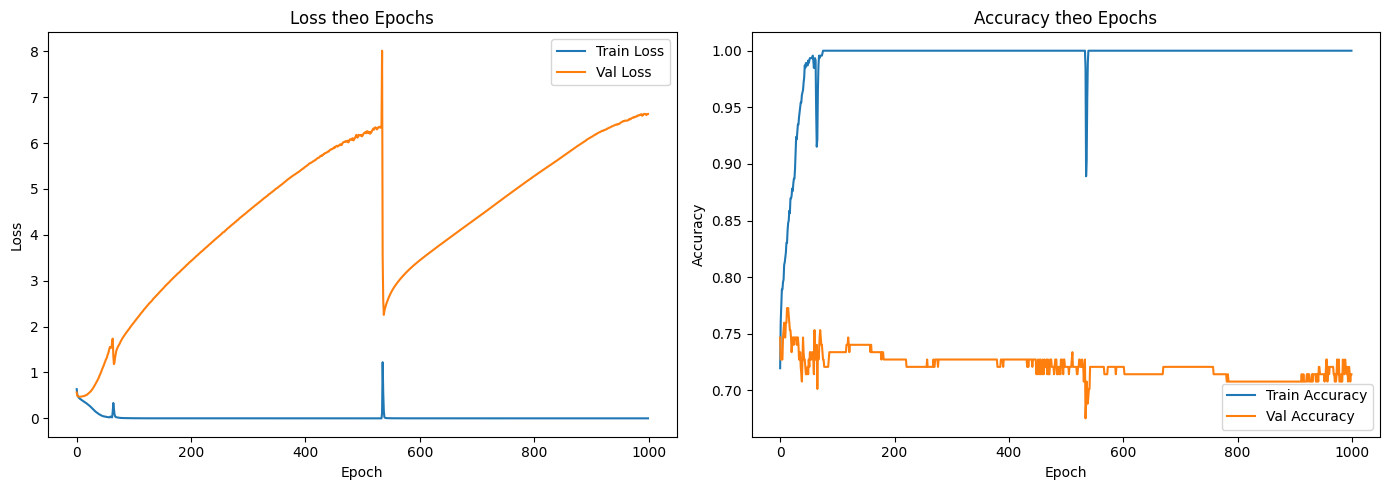

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight

# 1. Seed cho phép tái lập (có thể bỏ nếu muốn random)
np.random.seed(42)
tf.random.set_seed(42)

# 2. Tải dữ liệu
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=columns)

# 3. Xử lý giá trị 0 không hợp lý
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_fix:
    df[col] = df[col].replace(0, df[col].mean())

# 4. Tách dữ liệu
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 5. Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Chuẩn hóa
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# 7. Xây mạng nơ-ron mạnh hơn (Deep ANN)
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
# 8. Compile
model.compile(
    optimizer=Adam(learning_rate=0.0003),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 9. In kiến trúc
print("\n📋 Cấu trúc mạng nơ-ron:")
model.summary()

# 10. Train đủ 300 epoch, không dừng sớm, batch nhỏ, validation kỹ, cân bằng class
history = model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=8,
    validation_split=0.25,
    verbose=1,
    class_weight=class_weight_dict # Pass the class weight dictionary here
)

# 11. Dự đoán và đánh giá
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred_classes)
print(f"\n🎯 Accuracy trên tập test: {acc:.4f}")
print("\n📊 Báo cáo phân loại:\n", classification_report(y_test, y_pred_classes))

# 12. Vẽ biểu đồ Loss & Accuracy
plt.figure(figsize=(14, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss theo Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy theo Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
# Tạo widget nhập liệu
input_widgets = {
    'Pregnancies': widgets.IntText(value=0),
    'Glucose': widgets.FloatText(value=120.0),
    'BloodPressure': widgets.FloatText(value=70.0),
    'SkinThickness': widgets.FloatText(value=20.0),
    'Insulin': widgets.FloatText(value=80.0),
    'BMI': widgets.FloatText(value=25.0),
    'DiabetesPedigreeFunction': widgets.FloatText(value=0.5),
    'Age': widgets.IntText(value=30),
}

predict_button = widgets.Button(description="Dự đoán")
output_box = widgets.Output()

def on_predict_clicked(b):
    with output_box:
        clear_output()
        input_data = np.array([[input_widgets[key].value for key in input_widgets]])
        input_scaled = scaler.transform(input_data)
        prediction = model.predict(input_scaled)[0][0]
        label = "⚠️ Nguy cơ bị tiểu đường!" if prediction > 0.5 else "✅ Không bị tiểu đường."
        print(f"Kết quả dự đoán: {label} (Xác suất: {prediction:.2f})")

predict_button.on_click(on_predict_clicked)

# Hiển thị toàn bộ giao diện
display(widgets.VBox([widgets.Label("🔢 Nhập thông tin bệnh nhân")] +
        [widgets.HBox([widgets.Label(f"{k}: "), input_widgets[k]]) for k in input_widgets] +
        [predict_button, output_box]))


I've added a cell to install the `streamlit` library. Once the installation is complete, you can run the next cell to start the Streamlit app.

<!DOCTYPE html>
<html lang="vi">
<head>
  <meta charset="UTF-8" />
  <title>Chuẩn đoán Tiểu đường bằng AI</title>
  <script src="https://cdn.jsdelivr.net/npm/@tensorflow/tfjs@3.20.0/dist/tf.min.js"></script>
  <style>
    body {
      font-family: 'Segoe UI', sans-serif;
      background: linear-gradient(to right, #667eea, #764ba2);
      color: white;
      padding: 30px;
    }

    h1 {
      text-align: center;
      margin-bottom: 30px;
    }

    .form-container {
      background: white;
      color: #333;
      padding: 30px;
      border-radius: 15px;
      max-width: 900px;
      margin: 0 auto;
      box-shadow: 0 10px 25px rgba(0,0,0,0.15);
    }

    .form-group {
      display: grid;
      grid-template-columns: repeat(2, 1fr);
      gap: 20px;
    }

    label {
      font-weight: bold;
      display: block;
      margin-bottom: 5px;
    }

    input {
      padding: 10px;
      width: 100%;
      border: 1px solid #ccc;
      border-radius: 8px;
      font-size: 16px;
    }

    button {
      margin-top: 25px;
      padding: 12px 25px;
      border: none;
      border-radius: 8px;
      background: #5f27cd;
      color: white;
      font-size: 16px;
      cursor: pointer;
      transition: background 0.3s;
    }

    button:hover {
      background: #341f97;
    }

    .result {
      margin-top: 30px;
      padding: 20px;
      text-align: center;
      font-weight: bold;
      border-radius: 10px;
      font-size: 20px;
    }

    .positive {
      background-color: #ffeaa7;
      color: #d35400;
    }

    .negative {
      background-color: #b2f2bb;
      color: #2d6a4f;
    }
  </style>
</head>
<body>

  <h1>🧠 Chuẩn đoán bệnh Tiểu đường bằng Mô hình AI</h1>

  <div class="form-container">
    <div class="form-group">
      <div>
        <label>Số lần mang thai (Pregnancies):</label>
        <input type="number" id="pregnancies" value="1" min="0" />
      </div>
      <div>
        <label>Glucose:</label>
        <input type="number" id="glucose" value="120" />
      </div>
      <div>
        <label>Huyết áp (Blood Pressure):</label>
        <input type="number" id="bloodPressure" value="70" />
      </div>
      <div>
        <label>Độ dày da (Skin Thickness):</label>
        <input type="number" id="skinThickness" value="20" />
      </div>
      <div>
        <label>Insulin:</label>
        <input type="number" id="insulin" value="85" />
      </div>
      <div>
        <label>BMI:</label>
        <input type="number" id="bmi" value="25.0" />
      </div>
      <div>
        <label>Tiền sử gia đình (Pedigree):</label>
        <input type="number" id="diabetesPedigree" value="0.5" step="0.01" />
      </div>
      <div>
        <label>Tuổi (Age):</label>
        <input type="number" id="age" value="33" />
      </div>
    </div>

    <button onclick="predict()">🔍 Dự đoán</button>

    <div id="result" class="result" style="display:none;"></div>
  </div>

  <script>
    let model;
    // Các giá trị mean và std lấy từ StandardScaler đã dùng trong training Python
    const mean = [3.8, 120.9, 69.1, 20.5, 79.8, 31.9, 0.47, 33.2];
    const std = [3.4, 31.9, 19.3, 15.9, 115.2, 7.9, 0.33, 11.8];

    async function loadModel() {
      // NOTE: This path assumes your model.json is in a directory named tfjs_model
      // relative to the HTML file. Adjust the path if needed.
      model = await tf.loadLayersModel("tfjs_model/model.json");
      console.log("✅ Model loaded.");
    }

    async function predict() {
      if (!model) {
        alert("Model chưa được load.");
        return;
      }

      const inputs = [
        +document.getElementById("pregnancies").value,
        +document.getElementById("glucose").value,
        +document.getElementById("bloodPressure").value,
        +document.getElementById("skinThickness").value,
        +document.getElementById("insulin").value,
        +document.getElementById("bmi").value,
        +document.getElementById("diabetesPedigree").value,
        +document.getElementById("age").value
      ];

      const normalized = inputs.map((val, i) => (val - mean[i]) / std[i]);
      const inputTensor = tf.tensor2d([normalized]);

      const prediction = await model.predict(inputTensor).data();
      const prob = prediction[0];

      const result = document.getElementById("result");
      result.style.display = "block";

      if (prob > 0.5) {
        result.textContent = `⚠️ Nguy cơ MẮC bệnh tiểu đường: ${(prob * 100).toFixed(2)}%`;
        result.className = "result positive";
      } else {
        result.textContent = `✅ Không mắc bệnh tiểu đường: ${(100 - prob * 100).toFixed(2)}%`;
        result.className = "result negative";
      }
    }

    loadModel();
  </script>
</body>
</html>

In [11]:
!pip install ipywidgets scikit-learn tensorflow matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.8 MB/s eta 0:00:00
